In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
housing_data = pd.read_csv('C:/Girish_File/Girish_DS_pratice/housing_price.csv')
housing_data.shape

(1460, 81)

sample split - StratifiedShuffleSplit

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
div =StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in div.split(housing_data,housing_data['Neighborhood']):
    housing_train_set = housing_data.loc[train_index]
    housing_test_set = housing_data.loc[test_index]
print('housing_train_data_shape',housing_train_set.shape)
print('housing_test_data',housing_test_set.shape)

housing_train_data_shape (1168, 81)
housing_test_data (292, 81)


custom Sampling code

In [9]:
max_index = housing_data.shape[0]
print('max_index',max_index)
number = max_index*80/100
print('number', number)

max_index 1460
number 1168.0


In [10]:
train_index_c = np.linspace(start=0,stop=max_index,num=number,dtype=int)
train_index_c

array([   0,    1,    2, ..., 1457, 1458, 1460])

In [11]:
test_index_c = [x for x in range(max_index) if x not in train_index]
len(test_index_c)

292

In [12]:
housing_train_set_c = housing_data.loc[train_index_c]
housing_test_set_c = housing_data.loc[test_index_c]
housing_train_set_c.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0
5,6.0,50.0,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal,143000.0


In [13]:
housing_test_set_c.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
18,19,20,RL,66.0,13695,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,159000


Random Shuffle Split

In [14]:
from sklearn.model_selection import ShuffleSplit
div2 = ShuffleSplit(n_splits=1,random_state=42,test_size=0.2)
for train_index_rnd, test_index_rnd in div2.split(housing_data):
    housing_train_set_rnd = housing_data.loc[train_index_rnd]
    housing_test_set_rnd = housing_data.loc[test_index_rnd]
print(housing_train_set_rnd.shape)
print(housing_test_set_rnd.shape)

(1168, 81)
(292, 81)


sample split - StratifiedShuffleSplit - will refer going forward

In [15]:
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now look out for column name if need changes it accordingly '1stFlrSF', '2ndFlrSF',3SsnPorch

In [16]:
housing_train_set.rename(columns = {'1stFlrSF':'FstFlrSF','2ndFlrSF':'SndFlrSF','3SsnPorch':'TrdSsnPorch'},\
                                    inplace = True)
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF', 'SndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Now lets look at missing data isnull and isall

In [17]:
housing_train_set.isnull().head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
976,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
130,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
341,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1106,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1324,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [18]:
housing_train_set.isnull().any().head()

Id             False
MSSubClass     False
MSZoning       False
LotFrontage     True
LotArea        False
dtype: bool

In [19]:
housing_train_set.isnull().any().any()

True

In [20]:
housing_train_set.isnull().all()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual 

MCAR - independent , MAR - dependent, MNAR - dependent on another missing data

In [21]:
housing_train_set.count()

Id               1168
MSSubClass       1168
MSZoning         1168
LotFrontage       957
LotArea          1168
Street           1168
Alley              77
LotShape         1168
LandContour      1168
Utilities        1168
LotConfig        1168
LandSlope        1168
Neighborhood     1168
Condition1       1168
Condition2       1168
BldgType         1168
HouseStyle       1168
OverallQual      1168
OverallCond      1168
YearBuilt        1168
YearRemodAdd     1168
RoofStyle        1168
RoofMatl         1168
Exterior1st      1168
Exterior2nd      1168
MasVnrType       1160
MasVnrArea       1160
ExterQual        1168
ExterCond        1168
Foundation       1168
                 ... 
BedroomAbvGr     1168
KitchenAbvGr     1168
KitchenQual      1168
TotRmsAbvGrd     1168
Functional       1168
Fireplaces       1168
FireplaceQu       626
GarageType       1105
GarageYrBlt      1105
GarageFinish     1105
GarageCars       1168
GarageArea       1168
GarageQual       1105
GarageCond       1105
PavedDrive

In [22]:
max_index = housing_train_set.shape[0]
max_index

1168

In [27]:
max_index = housing_train_set.shape[0]
print('total', max_index)
col_cnt = housing_train_set.count()
print('column_count',col_cnt.head())
miss_column=[]
for x in col_cnt.index:
    if col_cnt[x]<max_index:
        miss_column.append(x)
print(miss_column)
len(miss_column)


total 1168
column_count Id             1168
MSSubClass     1168
MSZoning       1168
LotFrontage     957
LotArea        1168
dtype: int64
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


19

now lets look at the data type of missing columns

In [23]:
housing_train_set.count()[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]

LotFrontage      957
Alley             77
MasVnrType      1160
MasVnrArea      1160
BsmtQual        1137
BsmtCond        1137
BsmtExposure    1136
BsmtFinType1    1137
BsmtFinType2    1136
Electrical      1167
FireplaceQu      626
GarageType      1105
GarageYrBlt     1105
GarageFinish    1105
GarageQual      1105
GarageCond      1105
PoolQC             7
Fence            230
MiscFeature       45
dtype: int64

Function for missingdatafeature

In [45]:
def MissingFeature(df):
    feat_count = df.count()
    feat_shape = df.shape[0]
    data_missing_feature =[]
    for x in feat_count.index:
        if feat_count[x]<feat_shape:
            data_missing_feature.append(x)
    return data_missing_feature

In [25]:
print (MissingFeature(housing_train_set))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [26]:
housing_train_set.columns[housing_train_set.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [27]:
housing_train_set.shape

(1168, 81)

In [28]:
housing_train_set.dropna(axis=1,how='all',inplace=True)

In [29]:
housing_train_set.shape

(1168, 81)

Now lets look at the datatype of null column

In [30]:
housing_train_set[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',\
                   'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',\
                   'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',\
                   'PoolQC', 'Fence', 'MiscFeature']].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [31]:
housing_train_set.count()[['LotFrontage','MasVnrArea','GarageYrBlt']]

LotFrontage     957
MasVnrArea     1160
GarageYrBlt    1105
dtype: int64

In [32]:
housing_train_set.shape[0]

1168

In [29]:
housing_train_set.mean()[['LotFrontage','MasVnrArea','GarageYrBlt']]

LotFrontage      70.134796
MasVnrArea      103.018103
GarageYrBlt    1978.163801
dtype: float64

In [30]:
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage','MasVnrArea','GarageYrBlt']]).head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
976,977,30,RL,51.000000,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
130,131,60,RL,88.000000,14200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
341,342,20,RH,60.000000,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1106,1107,20,RL,114.000000,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
1324,1325,20,RL,75.000000,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000
479,480,30,RM,50.000000,5925,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,89471
199,200,20,RL,76.000000,9591,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,274900
557,558,50,C (all),60.000000,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
768,769,20,RL,70.000000,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,216837
1116,1117,80,RL,70.134796,7750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,184100


In [35]:
housing_train_set.isnull().any()[['LotFrontage','MasVnrArea','GarageYrBlt']]

LotFrontage    True
MasVnrArea     True
GarageYrBlt    True
dtype: bool

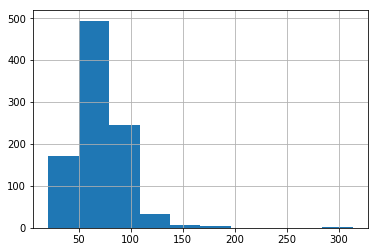

In [37]:
housing_train_set['LotFrontage'].hist(bins=10)

In [37]:
housing_train_set['LotFrontage']

976      51.0
130      88.0
341      60.0
1106    114.0
1324     75.0
479      50.0
199      76.0
557      60.0
768      70.0
1116      NaN
559       NaN
409      85.0
1278     75.0
1309      NaN
473     110.0
1069     60.0
568      79.0
572      83.0
207       NaN
602      80.0
928       NaN
1366     68.0
977      35.0
1235     96.0
905      80.0
89       60.0
550      53.0
423      80.0
393       NaN
375       NaN
        ...  
402      60.0
225      21.0
35      108.0
885      50.0
4        84.0
514      55.0
1279     60.0
1171     76.0
524      95.0
1088     24.0
637      50.0
133       NaN
919      87.0
956      24.0
1044     80.0
681      55.0
668       NaN
40       84.0
761      60.0
1195     51.0
714       NaN
1338     95.0
1445     70.0
144      70.0
554      85.0
652      70.0
378      88.0
1441      NaN
140      70.0
188      64.0
Name: LotFrontage, Length: 1168, dtype: float64

In [38]:
housing_train_set.LotFrontage.count()

957

In [39]:
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage']],inplace=True)
housing_train_set.LotFrontage.isnull().any()

False

In [40]:
housing_train_set.LotFrontage.isnull().head()

976     False
130     False
341     False
1106    False
1324    False
Name: LotFrontage, dtype: bool

In [41]:
housing_train_set[housing_train_set.LotFrontage.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [42]:
print(MissingFeature(housing_train_set))

['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [43]:
housing_train_set[['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].dtypes

Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [44]:
housing_train_set.MasVnrArea.count()

1160

In [45]:
housing_train_set.MasVnrArea.mean()

103.01810344827587

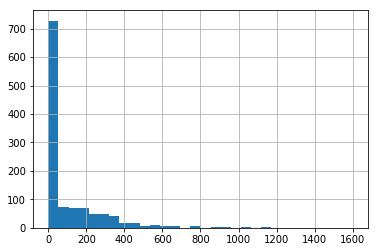

In [42]:
housing_train_set.MasVnrArea.hist(bins=30)

In [47]:
housing_train_set.MasVnrArea.fillna(value=0,inplace = True)

In [48]:
housing_train_set.MasVnrArea.isnull().any()

False

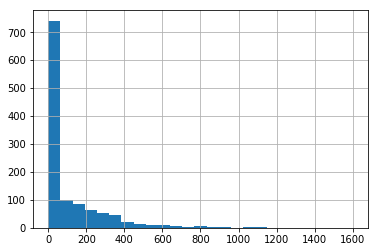

In [49]:
housing_train_set.MasVnrArea.hist(bins=25)

In [50]:
print(MissingFeature(housing_train_set))

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [51]:
housing_train_set[['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
].dtypes

Alley            object
MasVnrType       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [52]:
housing_train_set.GarageYrBlt.count()

1105

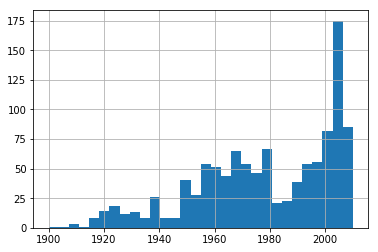

In [44]:
housing_train_set.GarageYrBlt.hist(bins=30)

In [54]:
housing_train_set.GarageYrBlt.head(100)

976        NaN
130     1966.0
341     1950.0
1106    1990.0
1324    2007.0
479     1995.0
199     2004.0
557     1994.0
768     2004.0
1116    2002.0
559     2003.0
409     2008.0
1278    2002.0
1309    1991.0
473     2006.0
1069    1985.0
568     1983.0
572     2009.0
207     1960.0
602     1992.0
928     2001.0
1366    1999.0
977     2007.0
1235    1914.0
905     1954.0
89         NaN
550     1977.0
423     1998.0
393        NaN
375        NaN
         ...  
684     1998.0
51      1985.0
1027    2008.0
742     2000.0
1374    2005.0
1320    1957.0
854     1955.0
1103    1954.0
106     1954.0
849     1976.0
634     1980.0
1307    2000.0
1348    1998.0
437     1926.0
872     1953.0
1455    1999.0
786     1961.0
1009       NaN
970        NaN
981     1998.0
1308    1948.0
45      2005.0
1291    1972.0
1180    1990.0
168     2004.0
599     1980.0
1142    2006.0
510     1951.0
1121    2005.0
1288    2000.0
Name: GarageYrBlt, Length: 100, dtype: float64

In [48]:
interpol_dumb = housing_train_set.GarageYrBlt.interpolate(method='nearest').ffill().bfill()
interpol_dumb.values[970]
housing_train_set.GarageYrBlt.count()
interpol_dumb

#need more clarification - Giri


976     1966.0
130     1966.0
341     1950.0
1106    1990.0
1324    2007.0
479     1995.0
199     2004.0
557     1994.0
768     2004.0
1116    2002.0
559     2003.0
409     2008.0
1278    2002.0
1309    1991.0
473     2006.0
1069    1985.0
568     1983.0
572     2009.0
207     1960.0
602     1992.0
928     2001.0
1366    1999.0
977     2007.0
1235    1914.0
905     1954.0
89      2009.0
550     1977.0
423     1998.0
393     1959.0
375     2003.0
         ...  
402     1940.0
225     1991.0
35      2004.0
885     1999.0
4       2000.0
514     1926.0
1279    1980.0
1171    1958.0
524     1996.0
1088    2004.0
637     1954.0
133     2001.0
919     1990.0
956     1980.0
1044    1981.0
681     1968.0
668     1999.0
40      1965.0
761     1965.0
1195    2005.0
714     1976.0
1338    2002.0
1445    1990.0
144     1963.0
554     2003.0
652     1996.0
378     2010.0
1441    2004.0
140     1997.0
188     1979.0
Name: GarageYrBlt, Length: 1168, dtype: float64

let now try with correction 

In [78]:
housing_train_set.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,TrdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004042,-0.010030,-0.032786,-0.016300,0.009043,-0.004670,-0.022686,-0.054229,0.005273,...,-0.032670,0.024923,-0.002723,-0.068839,0.010858,0.062212,-0.006240,0.041707,0.006896,-0.017679
MSSubClass,0.004042,1.000000,-0.361357,-0.123985,0.012862,-0.068393,0.046020,0.053515,0.024875,-0.080225,...,-0.005901,-0.007723,-0.018649,-0.048256,-0.035605,0.009390,-0.004994,0.014728,-0.019497,-0.093199
LotFrontage,-0.010030,-0.361357,1.000000,0.305660,0.232551,-0.039514,0.108152,0.078415,0.177579,0.240806,...,0.072516,0.129800,0.003532,0.051023,0.038259,0.194694,0.002020,0.003151,-0.004545,0.341098
LotArea,-0.032786,-0.123985,0.305660,1.000000,0.087840,0.003240,0.006101,0.009516,0.098801,0.211566,...,0.156170,0.068481,-0.011862,0.014013,0.044695,0.080507,0.040346,-0.020762,0.001316,0.252393
OverallQual,-0.016300,0.012862,0.232551,0.087840,1.000000,-0.077139,0.581078,0.555063,0.412149,0.258400,...,0.229156,0.302299,-0.100237,0.022916,0.043778,0.074022,-0.029203,0.054373,-0.020102,0.791682
OverallCond,0.009043,-0.068393,-0.039514,0.003240,-0.077139,1.000000,-0.351883,0.102381,-0.120195,-0.046007,...,0.009187,-0.036861,0.051643,0.015226,0.053720,-0.001094,0.071223,-0.018803,0.058343,-0.060165
YearBuilt,-0.004670,0.046020,0.108152,0.006101,0.581078,-0.351883,1.000000,0.589805,0.306555,0.250015,...,0.232441,0.195812,-0.389842,0.022267,-0.045727,0.006197,-0.032909,-0.007801,-0.026309,0.526712
YearRemodAdd,-0.022686,0.053515,0.078415,0.009516,0.555063,0.102381,0.589805,1.000000,0.171946,0.132358,...,0.211034,0.213531,-0.198599,0.027320,-0.051362,0.006577,-0.012715,0.010372,0.042851,0.507532
MasVnrArea,-0.054229,0.024875,0.177579,0.098801,0.412149,-0.120195,0.306555,0.171946,1.000000,0.246291,...,0.149873,0.086096,-0.113800,-0.003235,0.071825,0.013458,-0.028203,-0.014943,-0.010435,0.474407
BsmtFinSF1,0.005273,-0.080225,0.240806,0.211566,0.258400,-0.046007,0.250015,0.132358,0.246291,1.000000,...,0.200977,0.095193,-0.110568,0.009165,0.063206,0.155582,0.006685,-0.050962,0.019481,0.401410


In [79]:
import seaborn as sns

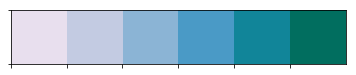

In [80]:
sns.palplot(sns.color_palette('PuBuGn'))

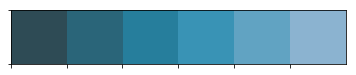

In [81]:
sns.palplot(sns.color_palette('PuBuGn_d'))

In [82]:
plt.figure(figsize = (16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

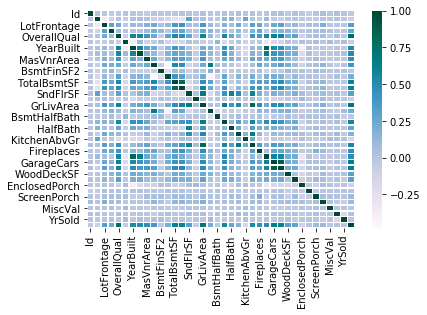

In [89]:
g=sns.heatmap(housing_train_set.corr(),linewidths=.5,cmap='PuBuGn')
#list1= g.set_yticklabels(g.get_yticklabels(),rotation=45)
#list2= g.set_xticklabels(g.get_xticklabels(),rotation=45)


In [2]:
housing_train_set.select_dtypes(include =('int64','float64')).shape

NameError: name 'housing_train_set' is not defined

from above heatmap it is clear that GarageYrBlt is correlated wit YrBit

lets now prove using statistic method using hypothesis 

In [130]:
# add more comments here
import statsmodels.formula.api as smf

In [131]:
# Ordinary least squares
linear_model_GargeYRBLT=smf.ols(formula='GarageYrBlt~YearBuilt',data=housing_train_set).fit()

In [132]:
linear_model_GargeYRBLT.summary()
# R-Squared - 69.5%
# F1 score - F-statistic

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GarageYrBlt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2513.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):          1.14e-286
Time:                        11:53:50   Log-Likelihood:                -4461.9
No. Observations:                1105   AIC:                             8928.
Df Residuals:                    1103   BIC:                             8938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    591.1666     27.669     21.365      0.000     536.876     645.457
YearBuilt      0.7031      0.014     50.133      0.000       0.676       0.731
==============================================================================
Omnibus:                      526.718   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3401.778
Skew:                           2.119   Prob(JB):                         0.00
Kurtosis:                      10.478   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
print(linear_model_GargeYRBLT.pvalues)

Intercept     4.998186e-85
YearBuilt    1.136836e-286
dtype: float64


since pvalue is less than .05 hecnce rejecting Null hypothesis (so it is dependent).
Approch here to interpolate value from year Blt, since interpolate use index , let moev the yearblt to index

In [134]:
housing_train_set.index

Int64Index([ 976,  130,  341, 1106, 1324,  479,  199,  557,  768, 1116,
            ...
             714, 1338, 1445,  144,  554,  652,  378, 1441,  140,  188],
           dtype='int64', length=1168)

In [135]:
housing_train_set.index= housing_train_set.YearBuilt

In [136]:
housing_train_set.index

Int64Index([1923, 1966, 1950, 1990, 2006, 1937, 2004, 1920, 2004, 2002,
            ...
            1976, 2002, 1966, 1963, 2003, 1996, 2010, 2004, 1971, 1979],
           dtype='int64', name='YearBuilt', length=1168)

In [137]:
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1923,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
1966,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
1950,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1990,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
2006,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000


In [138]:
interpolate_nearest = housing_train_set['GarageYrBlt'].interpolate(method='nearest').ffill().bfill()

print(interpolate_nearest.index[1009],interpolate_nearest.values[1009])
interpolate_nearest.head(10)
#interpolate_nearest.count()
#housing_train_set.count()

1930 1957.0


YearBuilt
1923    1966.0
1966    1966.0
1950    1950.0
1990    1990.0
2006    2007.0
1937    1995.0
2004    2004.0
1920    1994.0
2004    2004.0
2002    2002.0
Name: GarageYrBlt, dtype: float64

ffill bfill  error when there's only 1 non-null value, like in your example). The remaining null values are "edges" which are taken care of with .bfill().ffill() for the nearest logic

In [139]:
interpolate_index = housing_train_set.GarageYrBlt.interpolate(method='index').ffill().bfill()

print(interpolate_index.index[1009],interpolate_index.values[1009])
interpolate_index.head()
#interpolate_index.count()

1930 1957.0


YearBuilt
1923    1966.0
1966    1966.0
1950    1950.0
1990    1990.0
2006    2007.0
Name: GarageYrBlt, dtype: float64

In [140]:
interpolate_linear = housing_train_set.GarageYrBlt.interpolate(method='linear').ffill().bfill()

print(interpolate_linear.index[1009],interpolate_linear.values[1009])
interpolate_linear.head()
#interpolate_linear.count()

1930 1957.0


YearBuilt
1923    1966.0
1966    1966.0
1950    1950.0
1990    1990.0
2006    2007.0
Name: GarageYrBlt, dtype: float64

In [141]:
print(interpolate_nearest.values[375])
print(interpolate_index.values[375])
print(interpolate_linear.values[375])

1993.0
1993.0
1993.0


In [142]:
housing_train_set.GarageYrBlt.isnull().any()

True

In [143]:
housing_train_set.GarageYrBlt.count()

1105

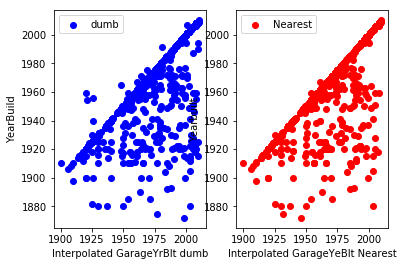

In [144]:
plt.subplot(1,2,1)
plt.scatter(interpol_dumb,housing_train_set.YearBuilt,c='blue', label='dumb')
plt.xlabel('Interpolated GarageYrBlt dumb')
plt.ylabel('YearBuild')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(interpolate_nearest,housing_train_set.YearBuilt,c='red',label='Nearest')
plt.xlabel('Interpolated GarageYeBlt Nearest')
plt.ylabel('Yearbuilt')
plt.legend()

Text(0,0.5,'Yearbuilt')

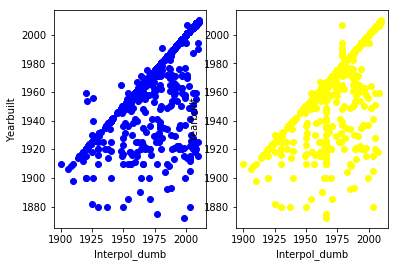

In [145]:
plt.subplot(1,2,1)
plt.scatter(interpol_dumb,housing_train_set.YearBuilt, c='blue',label = 'dumb')
plt.xlabel('Interpol_dumb')
plt.ylabel('Yearbuilt')
plt.subplot(1,2,2)
plt.scatter(interpolate_index,housing_train_set.YearBuilt, c='Yellow',label = 'dumb')
plt.xlabel('Interpol_dumb')
plt.ylabel('Yearbuilt')

Text(0,0.5,'Yearbuilt')

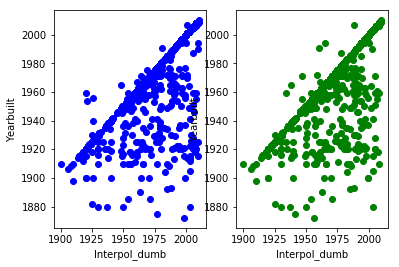

In [146]:
plt.subplot(1,2,1)
plt.scatter(interpol_dumb,housing_train_set.YearBuilt, c='blue',label = 'dumb')
plt.xlabel('Interpol_dumb')
plt.ylabel('Yearbuilt')
plt.subplot(1,2,2)
plt.scatter(interpolate_linear,housing_train_set.YearBuilt, c='Green',label = 'dumb')
plt.xlabel('Interpol_dumb')
plt.ylabel('Yearbuilt')

In [147]:
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YearBuilt,,,,,,,,,,,,,,,,,,,,,
1923,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
1966,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
1950,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
1990,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
2006,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000


In [156]:
interpol_nearest= housing_train_set.GarageYrBlt.interpolate(method='nearest').ffill().bfill()
housing_train_set['GarageYrBlt']= interpol_nearest.values
print(housing_train_set.GarageYrBlt.head())

YearBuilt
1923    1966.0
1966    1966.0
1950    1950.0
1990    1990.0
2006    2007.0
Name: GarageYrBlt, dtype: float64


In [159]:
housing_train_set.GarageYrBlt.isnull().any()

False

In [160]:
housing_train_set.reset_index(drop=True).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500
1,131,60,RL,88.0,14200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2006,WD,Normal,226000
2,342,20,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,82000
3,1107,20,RL,114.0,10357,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,179900
4,1325,20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,147000


In [162]:
housing_train_set.reset_index(drop=True,inplace=True)

In [164]:
housing_train_set.index

RangeIndex(start=0, stop=1168, step=1)

Handling missing value incategorical feature

In [594]:
housing_train_set.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [182]:
housing_train_set.select_dtypes(['object']).isnull().any()

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [193]:
len(housing_train_set[housing_train_set.GarageYrBlt.isnull()])

0

In [246]:
def getNullPercentage(df,feature):
    null_count = len(df[df[feature].isnull()])
    percentage_null = null_count*100/len(df)
    return null_count,percentage_null

In [247]:
def IsFeaturedropable (df,Lst_feature,thershold=75):
    sample_size = len(df)
    dict_drop_feat = dict()
    for feature in Lst_feature: 
        null_count,percentage_null= getNullPercentage(df,feature)
        print ('null count in {0}:{1}, percentage of Null:{2}'. format(feature,null_count,percentage_null))
        if percentage_null>thershold:
            print('dropable:{}'.format(feature))
            dict_drop_feat[feature]= True
        else:
            dict_drop_feat[feature]= False
    return dict_drop_feat

In [248]:
def getCatFeatureWithNull(df):
    ser_dtypes = df.dtypes
    str_col_with_null=[x for x in ser_dtypes.index
                      if ser_dtypes[x] in['object']
                      and len(df[df[x].notnull()])<len(df)]
    return str_col_with_null

In [249]:
housing_train_set.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [250]:
housing_train_set.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [251]:
dict_drop_feat = IsFeaturedropable(housing_train_set,getCatFeatureWithNull(housing_train_set))

null count in Alley:1091, percentage of Null:93.40753424657534
dropable:Alley
null count in MasVnrType:8, percentage of Null:0.684931506849315
null count in BsmtQual:31, percentage of Null:2.654109589041096
null count in BsmtCond:31, percentage of Null:2.654109589041096
null count in BsmtExposure:32, percentage of Null:2.73972602739726
null count in BsmtFinType1:31, percentage of Null:2.654109589041096
null count in BsmtFinType2:32, percentage of Null:2.73972602739726
null count in Electrical:1, percentage of Null:0.08561643835616438
null count in FireplaceQu:542, percentage of Null:46.4041095890411
null count in GarageType:63, percentage of Null:5.3938356164383565
null count in GarageFinish:63, percentage of Null:5.3938356164383565
null count in GarageQual:63, percentage of Null:5.3938356164383565
null count in GarageCond:63, percentage of Null:5.3938356164383565
null count in PoolQC:1161, percentage of Null:99.40068493150685
dropable:PoolQC
null count in Fence:938, percentage of Null

In [252]:
dict_drop_feat

{'Alley': True,
 'MasVnrType': False,
 'BsmtQual': False,
 'BsmtCond': False,
 'BsmtExposure': False,
 'BsmtFinType1': False,
 'BsmtFinType2': False,
 'Electrical': False,
 'FireplaceQu': False,
 'GarageType': False,
 'GarageFinish': False,
 'GarageQual': False,
 'GarageCond': False,
 'PoolQC': True,
 'Fence': True,
 'MiscFeature': True}

In [259]:
print(housing_train_set.shape)
for col,flag in dict_drop_feat.items():
    if flag:
        housing_train_set.drop(col,axis=1,inplace=True)
print(housing_train_set.shape)

(1168, 81)
(1168, 77)


we have removed column for which we had more than 75 missing data 
Now let work on Univariate analysis for rest of missing column

In [266]:
housing_train_set.BsmtCond.count()

1137

In [264]:
housing_train_set.BsmtCond.value_counts()

TA    1046
Gd      54
Fa      35
Po       2
Name: BsmtCond, dtype: int64

In [271]:
len(housing_train_set[housing_train_set.BsmtCond.isnull()])

31

Since Majority of the data falls under TA , let get this missing value TA

In [274]:
housing_train_set.BsmtCond.fillna(value='TA',inplace=True)

In [275]:
len(housing_train_set[housing_train_set.BsmtCond.isnull()])

0

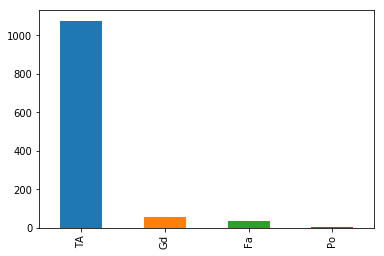

In [286]:
housing_train_set.BsmtCond.value_counts().plot(kind='Bar')

Bivariate Analysis

In [280]:
housing_train_set.MasVnrArea.count()

1168

In [281]:
housing_train_set.MasVnrType.count()

1160

In [284]:
housing_train_set.MasVnrType.value_counts()

None       695
BrkFace    353
Stone      101
BrkCmn      11
Name: MasVnrType, dtype: int64

In [285]:
housing_train_set.MasVnrType.isnull().any()

True

In [290]:
data = pd.concat([housing_train_set.MasVnrType,housing_train_set.MasVnrArea],axis=1)
data

,MasVnrType,MasVnrArea
0,None,0.0
1,BrkFace,309.0
2,None,0.0
3,None,0.0
4,BrkFace,428.0
5,BrkCmn,435.0
6,BrkFace,262.0
7,None,0.0
8,None,0.0
9,None,0.0


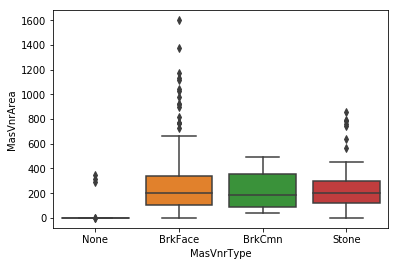

In [291]:
fig = sns.boxplot(x = 'MasVnrType', y ='MasVnrArea',data = data)

from above we can observe that for None type the area is 0, except for few data
lets look out for few data under None type

In [628]:
housing_train_set[(housing_train_set.MasVnrType=='None')& (housing_train_set.MasVnrArea!=0)][['MasVnrType','MasVnrArea']]

AttributeError: 'DataFrame' object has no attribute 'MasVnrType'

In [315]:
data1=housing_train_set[['MasVnrArea','SalePrice']]
data1

,MasVnrArea,SalePrice
0,0.0,85500
1,309.0,226000
2,0.0,82000
3,0.0,179900
4,428.0,147000
5,435.0,89471
6,262.0,274900
7,0.0,108000
8,0.0,216837
9,0.0,184100


In [316]:
data1.corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.474407
SalePrice,0.474407,1.000000


With this we can conclude that MasVnrArea has not significant , hence we can go ahead and remove MasVnrArea and Type

In [320]:
data2 = housing_train_set[(housing_train_set.MasVnrArea!=0) & (housing_train_set.MasVnrArea.notnull())][['MasVnrArea','SalePrice']]
data2.corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.431511
SalePrice,0.431511,1.000000


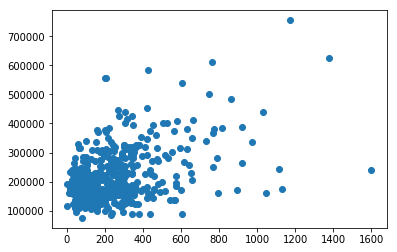

In [323]:
plt.scatter(data2.MasVnrArea,data2.SalePrice,data=data2)

In [325]:
housing_train_set.drop('MasVnrType',axis=1,inplace=True)

In [326]:
housing_train_set.drop('MasVnrArea',axis=1,inplace=True)

Categorical to Categorical

In [328]:
housing_train_set.SaleCondition.value_counts()

Normal     958
Partial     95
Abnorml     86
Family      15
Alloca      10
AdjLand      4
Name: SaleCondition, dtype: int64

In [329]:
housing_train_set.SaleCondition.count()

1168

In [330]:
housing_train_set.LandSlope.value_counts()

Gtl    1110
Mod      47
Sev      11
Name: LandSlope, dtype: int64

In [332]:
housing_train_set.LandSlope.count()

1168

In [333]:
housing_train_set.shape

(1168, 75)

here explaniatory/independent is LandSlope where SaleComdition is response/y axis, since this Cat to Cat and y axis has multiple cat for which we need convert int o binary , identifing the max data is in Normal so making Normal as 1 ans rest as 0 

In [391]:
data3 = pd.concat([housing_train_set.LandSlope,housing_train_set.SaleCondition],axis=1)[['LandSlope','SaleCondition']]
data3.head()

,LandSlope,SaleCondition
0,Gtl,Normal
1,Gtl,Normal
2,Gtl,Normal
3,Gtl,Normal
4,Gtl,Partial


In [392]:
def mapSaleConditionToBinary(Val):
    if (Val=='Normal'):
        return 1
    else:
        return 0

In [394]:
housing_train_set['SaleCondBin']=housing_train_set.SaleCondition.apply(lambda x: mapSaleConditionToBinary(x))

In [396]:
housing_train_set.SaleCondBin.value_counts()

1    958
0    210
Name: SaleCondBin, dtype: int64

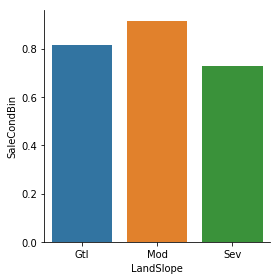

In [421]:
sns.factorplot(data = housing_train_set,x='LandSlope',y ='SaleCondBin',kind="bar",ci=None)

Cat to Quantitative MSSubclass- Cat to SalePrice(Quant)

In [416]:
housing_train_set.MSSubClass.value_counts()

20     432
60     241
50     112
120     67
30      54
160     52
70      48
80      47
90      43
190     23
85      14
75      12
45      11
180      9
40       3
Name: MSSubClass, dtype: int64

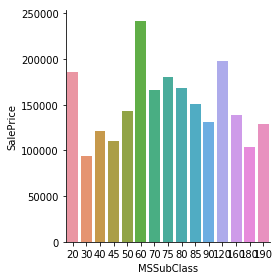

In [420]:
sns.factorplot(data = housing_train_set, x = 'MSSubClass', y='SalePrice', kind ='bar', ci=None)

In [429]:
mssub_class_dict = {20:'1 Story 1964',
                   30:'1 story 1945',
                   40:'1 Story Finished',
                   45:'1 Stroy Unfinshed',
                   50:'1,5 Story Finished',
                   60:'2 1946',
                   70:'2 1945',
                   75:'2.5',
                   80:'split',
                   85:'split2',
                   90:'duplx',
                  120:'PUD',
                  150:'1.5PUD',
                  160:'2 PUD',
                  180:'Mul PUD',
                  190:'Family'}
housing_train_set['MapSubClass']=housing_train_set.MSSubClass.map(mssub_class_dict)

In [432]:
housing_train_set.MapSubClass.head()

0    1 story 1945
1          2 1946
2    1 Story 1964
3    1 Story 1964
4    1 Story 1964
Name: MapSubClass, dtype: object

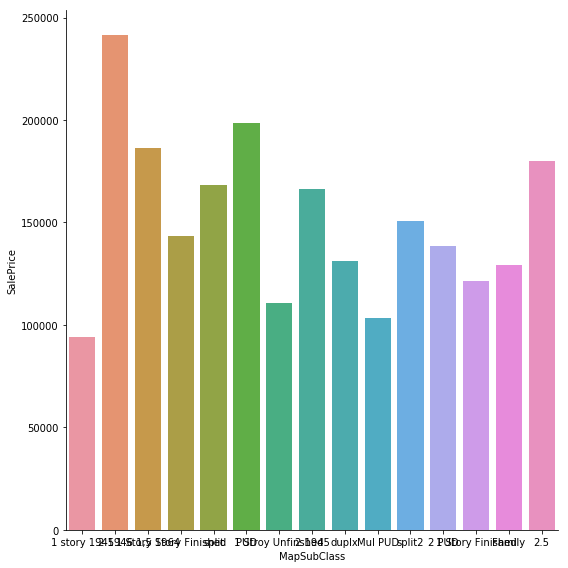

In [438]:
sns.factorplot(data=housing_train_set,x='MapSubClass',y='SalePrice',kind='bar',ci=None,size=8)


In [435]:
housing_train_set.MapSubClass.value_counts()

1 Story 1964          432
2 1946                241
1,5 Story Finished    112
PUD                    67
1 story 1945           54
2 PUD                  52
2 1945                 48
split                  47
duplx                  43
Family                 23
split2                 14
2.5                    12
1 Stroy Unfinshed      11
Mul PUD                 9
1 Story Finished        3
Name: MapSubClass, dtype: int64

In [448]:
MissingFeature(housing_train_set)

['BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [455]:
df1=housing_train_set[['CentralAir','SalePrice']].dropna()
df1.head()

,CentralAir,SalePrice
0,Y,85500
1,Y,226000
2,Y,82000
3,Y,179900
4,Y,147000


In [456]:
df1.CentralAir.value_counts()

Y    1088
N      80
Name: CentralAir, dtype: int64

In [460]:
df1.groupby('CentralAir').mean()


,SalePrice
CentralAir,
N,104601.087500
Y,186776.606618


In [461]:
df1.groupby('CentralAir').std()

,SalePrice
CentralAir,
N,42211.602540
Y,80356.500118


In [ ]:
import statmodels.formula.api as smf

In [464]:
ols=smf.ols(formula='SalePrice~CentralAir',data =df1).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     81.95
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           5.71e-19
Time:                        12:50:23   Log-Likelihood:                -14819.
No. Observations:                1168   AIC:                         2.964e+04
Df Residuals:                    1166   BIC:                         2.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.046e+05   8760.992     11.939      0.000    8.74e+04    1.22e+05
CentralAir[T.Y]  8.218e+04   9077.374      9.053      0.000    6.44e+04       1e+05
==============================================================================
Omnibus:                      557.583   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3883.321
Skew:                           2.097   Prob(JB):                         0.00
Kurtosis:                      10.887   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:
df2= housing_train_set[['Heating','SalePrice']]
df2.head()

,Heating,SalePrice
0,GasA,85500
1,GasA,226000
2,GasA,82000
3,GasA,179900
4,GasA,147000


In [469]:
df2.Heating.value_counts()

GasA    1141
GasW      14
Grav       7
Wall       4
OthW       2
Name: Heating, dtype: int64

In [474]:
mean=df2.groupby('Heating').mean()
print(mean)

             SalePrice
Heating               
GasA     182376.736196
GasW     167312.785714
Grav      75271.428571
OthW     125750.000000
Wall      92100.000000


Cat with more than 2 value above

In [475]:
print(mean.index)

Index(['GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype='object', name='Heating')


In [495]:
unseen=list(mean.index)
for x1 in mean.index:
    unseen.remove(x1)
    for x2 in mean.index:
        if (x2 in mean.index):
            dif=int(mean.loc[x1].values)-int(mean.loc[x2].values)
            if ((dif)<15000):
                print('Difference between \'{0}\' and \'{1}\' =\'{2}\' is low' .format(x1,x2,dif))
            else:
                  print('Difference between \'{0}\' and \'{1}\' =\'{2}\' is High' .format(x1,x2,dif))     

Difference between 'GasA' and 'GasA' ='0' is low
Difference between 'GasA' and 'GasW' ='15064' is High
Difference between 'GasA' and 'Grav' ='107105' is High
Difference between 'GasA' and 'OthW' ='56626' is High
Difference between 'GasA' and 'Wall' ='90276' is High
Difference between 'GasW' and 'GasA' ='-15064' is low
Difference between 'GasW' and 'GasW' ='0' is low
Difference between 'GasW' and 'Grav' ='92041' is High
Difference between 'GasW' and 'OthW' ='41562' is High
Difference between 'GasW' and 'Wall' ='75212' is High
Difference between 'Grav' and 'GasA' ='-107105' is low
Difference between 'Grav' and 'GasW' ='-92041' is low
Difference between 'Grav' and 'Grav' ='0' is low
Difference between 'Grav' and 'OthW' ='-50479' is low
Difference between 'Grav' and 'Wall' ='-16829' is low
Difference between 'OthW' and 'GasA' ='-56626' is low
Difference between 'OthW' and 'GasW' ='-41562' is low
Difference between 'OthW' and 'Grav' ='50479' is High
Difference between 'OthW' and 'OthW' ='0'

here we have few low and High, this clear says that this has relation with Saleprice.let checek Ho

In [498]:
ols2=smf.ols(formula = 'SalePrice~C(Heating)',data =df2).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.654
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           0.000992
Time:                        14:20:08   Log-Likelihood:                -14849.
No. Observations:                1168   AIC:                         2.971e+04
Df Residuals:                    1163   BIC:                         2.973e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.824e+05   2384.055     76.499      0.000    1.78e+05    1.87e+05
C(Heating)[T.GasW] -1.506e+04   2.17e+04     -0.696      0.487   -5.75e+04    2.74e+04
C(Heating)[T.Grav] -1.071e+05   3.05e+04     -3.508      0.000   -1.67e+05   -4.72e+04
C(Heating)[T.OthW] -5.663e+04    5.7e+04     -0.994      0.321   -1.68e+05    5.52e+04
C(Heating)[T.Wall] -9.028e+04   4.03e+04     -2.238      0.025   -1.69e+05   -1.11e+04
==============================================================================
Omnibus:                      531.106   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3408.970
Skew:                           2.006   Prob(JB):                         0.00
Kurtosis:                      10.345   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [499]:
print(ols2.pvalues)

Intercept             0.000000
C(Heating)[T.GasW]    0.486782
C(Heating)[T.Grav]    0.000469
C(Heating)[T.OthW]    0.320640
C(Heating)[T.Wall]    0.025401
dtype: float64


In [508]:
import statsmodels.stats.multicomp as multi
mc1= multi.MultiComparison(df2['SalePrice'],df2['Heating'])
res1 = mc1.tukeyhsd()
print(res1.summary())

    Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper    reject
----------------------------------------------------------
 GasA   GasW  -15063.9505  -74224.6166   44096.7157 False 
 GasA   Grav  -107105.3076 -190517.206  -23693.4093  True 
 GasA   OthW  -56626.7362  -212335.9094  99082.437  False 
 GasA   Wall  -90276.7362  -200476.0344  19922.562  False 
 GasW   Grav  -92041.3571  -193887.7174  9805.0031  False 
 GasW   OthW  -41562.7857  -207877.1956 124751.6241 False 
 GasW   Wall  -75212.7857  -199948.5931  49523.0217 False 
 Grav   OthW   50478.5714  -125924.4991  226881.642 False 
 Grav   Wall   16828.5714  -121072.0523 154729.1951 False 
 OthW   Wall    -33650.0   -224187.0931 156887.0931 False 
----------------------------------------------------------


here False says to reject Ho , if amy one result in False we reject Ho. If incase we have all True we accept Ho

Cat to cat

In [511]:
housing_train_set['BsmtQual'].value_counts()

TA    524
Gd    487
Ex     97
Fa     29
Name: BsmtQual, dtype: int64

In [512]:
housing_train_set['OverallQual'].value_counts()

5     322
6     298
7     261
8     128
4      94
9      32
10     15
3      13
2       3
1       2
Name: OverallQual, dtype: int64

In [515]:
df4= housing_train_set[['BsmtQual','OverallQual']]
df4.head()

,BsmtQual,OverallQual
0,Gd,4
1,TA,7
2,TA,4
3,Gd,7
4,Ex,8


In [522]:
df4['BsmtQual']=pd.Categorical(df4['BsmtQual'])
df4['OverallQual']=pd.Categorical(df4['OverallQual'])
cross_tab = pd.crosstab(df4.BsmtQual,df4.OverallQual,margins=True)
cross_tab

OverallQual,1,2,3,4,5,6,7,8,9,10,All
BsmtQual,,,,,,,,,,,
Gd,0,0,0,14,50,127,204,89,3,0,487
TA,0,3,6,63,244,160,41,6,0,1,524
Ex,0,0,0,0,2,6,13,33,29,14,97
Fa,1,0,2,6,13,5,2,0,0,0,29
All,1,3,8,83,309,298,260,128,32,15,1137


In [536]:
import scipy.stats as stats
c2table = stats.chi2_contingency(cross_tab)
c2table

(943.1756427581794,
 8.364220638300455e-172,
 40,
 array([[4.28320141e-01, 1.28496042e+00, 3.42656113e+00, 3.55505717e+01,
         1.32350923e+02, 1.27639402e+02, 1.11363237e+02, 5.48249780e+01,
         1.37062445e+01, 6.42480211e+00, 4.87000000e+02],
        [4.60861917e-01, 1.38258575e+00, 3.68689534e+00, 3.82515391e+01,
         1.42406332e+02, 1.37336851e+02, 1.19824099e+02, 5.89903254e+01,
         1.47475814e+01, 6.91292876e+00, 5.24000000e+02],
        [8.53122252e-02, 2.55936675e-01, 6.82497801e-01, 7.08091469e+00,
         2.63614776e+01, 2.54230431e+01, 2.21811785e+01, 1.09199648e+01,
         2.72999120e+00, 1.27968338e+00, 9.70000000e+01],
        [2.55057168e-02, 7.65171504e-02, 2.04045734e-01, 2.11697449e+00,
         7.88126649e+00, 7.60070361e+00, 6.63148637e+00, 3.26473175e+00,
         8.16182938e-01, 3.82585752e-01, 2.90000000e+01],
        [1.00000000e+00, 3.00000000e+00, 8.00000000e+00, 8.30000000e+01,
         3.09000000e+02, 2.98000000e+02, 2.60000000e+02, 1.28

In [529]:
map1={'TA':'TA','Gd':'Gd'}
temp3 = df4.copy()
temp3['BsmtQual']=df4['BsmtQual'].map(map1)
temp3.BsmtQual.value_counts()

TA    524
Gd    487
Name: BsmtQual, dtype: int64

In [531]:
pd.crosstab(temp3.BsmtQual,temp3.OverallQual,margins=True)

OverallQual,2,3,4,5,6,7,8,9,10,All
BsmtQual,,,,,,,,,,
Gd,0,0,14,50,127,204,89,3,0,487
TA,3,6,63,244,160,41,6,0,1,524
All,3,6,77,294,287,245,95,3,1,1011


In [544]:
unq_cat = df4['BsmtQual'].unique()
seen_cat = []
accept_nh_list =[]
relect_list =[]
for cat1 in unq_cat:
    seen_cat.append(cat1)
    for cat2 in unq_cat:
        if cat2 not in seen_cat:
            print('calcuation ChiSquae for \'{0}\'-\'{1}\'Pair'.format(cat1,cat2))
            df4_copy = df4.copy()
            df4_copy['BsmtQual']= df4['BsmtQual'].map({cat1:cat1,cat2:cat2})
            ct=pd.crosstab(df4_copy['BsmtQual'],df4_copy['OverallQual'],margins=True)
            c3_tab=stats.chi2_contingency(ct)
            pair=cat1, '-' ,cat2
            print(pair)
            if(c3_tab[1]<.005):
                print ('Reject')
                relect_list.append(pair)
            else:
                print('Accept')
                accept_nh_list.append(pair)
            print(100*'-')

calcuation ChiSquae for 'Gd'-'TA'Pair
('Gd', '-', 'TA')
Reject
----------------------------------------------------------------------------------------------------
calcuation ChiSquae for 'Gd'-'Ex'Pair
('Gd', '-', 'Ex')
Reject
----------------------------------------------------------------------------------------------------
calcuation ChiSquae for 'Gd'-'Fa'Pair
('Gd', '-', 'Fa')
Reject
----------------------------------------------------------------------------------------------------
calcuation ChiSquae for 'Gd'-'nan'Pair
('Gd', '-', nan)
Accept
----------------------------------------------------------------------------------------------------
calcuation ChiSquae for 'TA'-'Ex'Pair
('TA', '-', 'Ex')
Reject
----------------------------------------------------------------------------------------------------
calcuation ChiSquae for 'TA'-'Fa'Pair
('TA', '-', 'Fa')
Accept
----------------------------------------------------------------------------------------------------
calcuation ChiSq

Data Filter and Aggregate the data

In [552]:
housing_train_set[['YearBuilt','HouseStyle','SalePrice']].head()

,YearBuilt,HouseStyle,SalePrice
0,1923,1Story,85500
1,1966,2Story,226000
2,1950,1Story,82000
3,1990,1Story,179900
4,2006,1Story,147000


In [558]:
df6=pd.pivot_table(housing_train_set,values='SalePrice',index=['YearBuilt'],columns=['HouseStyle'])
df6.head()

HouseStyle,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
YearBuilt,,,,,,,,
1872,NaN,NaN,NaN,NaN,NaN,122000.000000,NaN,NaN
1875,94000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,295000.0,NaN,169159.666667,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,168000.000000,NaN,NaN
1885,NaN,NaN,100000.0,NaN,NaN,122500.000000,NaN,NaN


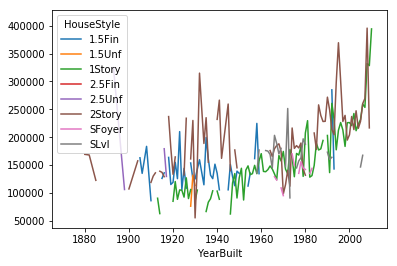

In [560]:
df6.plot()

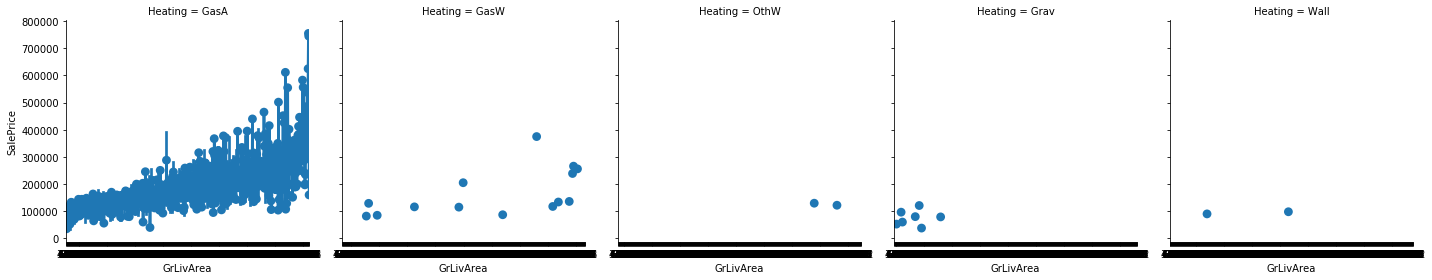

In [562]:
sns.factorplot(data=housing_train_set,x='GrLivArea',y='SalePrice',col='Heating')

In [590]:
housing_train_set[['MSSubClass','GrLivArea']].dtypes


MSSubClass    int64
GrLivArea     int64
dtype: object

In [617]:
housing_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [621]:
housing_data.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [626]:
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [625]:
housing_data.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
         ... 
14.0        1
53.0        1
24.0        1
127.0       1
365.0       1
115.0       1
562.0       1
259.0       1
378.0       1
219.0       1
161.0       1
247.0       1
109.0       1
278.0       1
375.0       1
225.0       1
604.0       1
762.0       1
290.0       1
299.0       1
202.0       1
731.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
337.0       1
415.0       1
293.0       1
621.0       1
Name: MasVnrArea, Length: 327, dtype: int64

In [631]:
df8=housing_data[(housing_data.MasVnrType=='None')& (housing_data.MasVnrArea!=0)][['MasVnrType','MasVnrArea']]
df8

,MasVnrType,MasVnrArea
624,None,288.0
773,None,1.0
1230,None,1.0
1300,None,344.0
1334,None,312.0


multivariate Analysis

In [632]:
housing_train_set.select_dtypes(['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'TrdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'SaleCondBin'],
      dtype='object')

In [635]:
def getNumericalNonNullFeature(df):
    ser_dtypes = df.dtypes
    nul_col_names= [x for x in ser_dtypes.index
                   if ser_dtypes[x] in ['int64','float64']
                   and df[x].shape[0]==len(df)]
    return nul_col_names

In [636]:
numerical_feature = getNumericalNonNullFeature(housing_train_set)
print(numerical_feature)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'TrdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SaleCondBin']


In [638]:
numerical_feature.remove('SalePrice')

In [640]:
print(numerical_feature)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'TrdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleCondBin']


In [648]:
c_numerical_feature = housing_train_set[numerical_feature]-housing_train_set[numerical_feature].mean()
c_numerical_feature.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,TrdSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondBin
0,239.999144,-26.819349,-19.134796,-4677.692637,-2.087329,1.440925,-48.004281,-26.851027,-441.082192,-48.105308,...,-95.776541,-46.707192,-22.422089,-3.349315,-14.585616,-3.44863,-49.010274,1.693493,-1.849315,0.179795
1,-606.000856,3.180651,17.865204,3622.307363,0.912671,0.440925,-5.004281,-18.851027,3.917808,-48.105308,...,9.223459,19.292808,-22.422089,-3.349315,-14.585616,-3.44863,-49.010274,-1.306507,-1.849315,0.179795
2,-395.000856,-36.819349,-10.134796,-2177.692637,-2.087329,-1.559075,-21.004281,-34.851027,-441.082192,-48.105308,...,154.223459,-46.707192,1.577911,-3.349315,-14.585616,-3.44863,-49.010274,2.693493,1.150685,0.179795
3,369.999144,-36.819349,43.865204,-220.692637,0.912671,-0.559075,18.995719,6.148973,296.917808,-48.105308,...,-95.776541,197.292808,-22.422089,-3.349315,-14.585616,-3.44863,-49.010274,-1.306507,-0.849315,0.179795
4,587.999144,-36.819349,4.865204,-591.692637,1.912671,-0.559075,34.995719,22.148973,-441.082192,-48.105308,...,-95.776541,2.292808,-22.422089,-3.349315,-14.585616,-3.44863,-49.010274,-4.306507,-0.849315,-0.820205


In [649]:
formula_input_feature = '+'.join(numerical_feature)
print(formula_input_feature)

Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FstFlrSF+SndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+TrdSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleCondBin


In [655]:
c_numerical_feature['SalePrice']= housing_train_set['SalePrice']

In [656]:
c_numerical_feature.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'TrdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondBin', 'Saleprice', 'SalePrice'],
      dtype='object')

In [657]:
import statsmodels.formula.api as smf
multi_reg_model = smf.ols(formula = 'SalePrice~'+ formula_input_feature,data=c_numerical_feature).fit()
multi_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:40:38   Log-Likelihood:                -13863.
No. Observations:                1168   AIC:                         2.780e+04
Df Residuals:                    1132   BIC:                         2.798e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.811e+05   1026.868    176.408      0.000    1.79e+05    1.83e+05
Id               -3.6071      2.458     -1.468      0.143      -8.430       1.216
MSSubClass     -188.4100     31.326     -6.015      0.000    -249.873    -126.947
LotFrontage     -50.8861     57.082     -0.891      0.373    -162.885      61.113
LotArea           0.4397      0.107      4.102      0.000       0.229       0.650
OverallQual    1.817e+04   1369.339     13.270      0.000    1.55e+04    2.09e+04
OverallCond    5343.0225   1176.081      4.543      0.000    3035.479    7650.566
YearBuilt       383.1520     77.523      4.942      0.000     231.048     535.256
YearRemodAdd    116.0730     77.383      1.500      0.134     -35.757     267.903
BsmtFinSF1       12.2008      2.812      4.338      0.000       6.683      17.719
BsmtFinSF2       -4.0490      5.063     -0.800      0.424     -13.982       5.884
BsmtUnfSF        -1.1291      2.763     -0.409      0.683      -6.550       4.292
TotalBsmtSF       7.0227      3.767      1.864      0.063      -0.368      14.414
FstFlrSF         31.6459      7.332      4.316      0.000      17.259      46.032
SndFlrSF         29.8592      6.747      4.426      0.000      16.621      43.097
LowQualFinSF    -31.8549     18.034     -1.766      0.078     -67.238       3.528
GrLivArea        29.6501      6.792      4.365      0.000      16.324      42.977
BsmtFullBath   8659.0525   3026.380      2.861      0.004    2721.107    1.46e+04
BsmtHalfBath   -234.5311   4666.248     -0.050      0.960   -9389.998    8920.936
FullBath       2062.4419   3231.051      0.638      0.523   -4277.079    8401.963
HalfBath      -2810.4183   3018.147     -0.931      0.352   -8732.209    3111.373
BedroomAbvGr  -1.192e+04   1908.112     -6.245      0.000   -1.57e+04   -8171.753
KitchenAbvGr  -1.342e+04   5806.982     -2.310      0.021   -2.48e+04   -2021.363
TotRmsAbvGrd   5218.8877   1378.723      3.785      0.000    2513.748    7924.027
Fireplaces      996.0531   2031.080      0.490      0.624   -2989.051    4981.157
GarageYrBlt     -10.2287     82.947     -0.123      0.902    -172.976     152.518
GarageCars     1.313e+04   3292.299      3.989      0.000    6673.849    1.96e+04
GarageArea      -12.3782     11.640     -1.063      0.288     -35.216      10.460
WoodDeckSF       25.2124      9.050      2.786      0.005       7.456      42.969
OpenPorchSF       2.8675     16.959      0.169      0.866     -30.407      36.142
EnclosedPorch     5.7508     18.890      0.304      0.761     -31.313      42.815
TrdSsnPorch     -37.0720     34.643     -1.070      0.285    -105.043      30.899
ScreenPorch      49.1392     19.500      2.520      0.012      10.879      87.399
PoolArea        -47.8834     24.393     -1.963      0.050     -95.744      -0.023
MiscVal          -0.8504      1.897     -0.448   

In [755]:
multi_reg_model.pvalues.sort_values

<bound method Series.sort_values of Intercept        0.000000e+00
OverallQual      1.851839e-37
BedroomAbvGr     5.995955e-10
MSSubClass       2.431262e-09
YearBuilt        8.877567e-07
OverallCond      6.138255e-06
SndFlrSF         1.054357e-05
GrLivArea        1.385163e-05
BsmtFinSF1       1.565078e-05
FstFlrSF         1.728556e-05
LotArea          4.384339e-05
GarageCars       7.056278e-05
TotRmsAbvGrd     1.615704e-04
BsmtFullBath     4.298155e-03
WoodDeckSF       5.426144e-03
SaleCondBin      5.750028e-03
ScreenPorch      1.187316e-02
KitchenAbvGr     2.105880e-02
PoolArea         4.989094e-02
TotalBsmtSF      6.253870e-02
LowQualFinSF     7.759675e-02
YearRemodAdd     1.338970e-01
Id               1.425146e-01
TrdSsnPorch      2.847903e-01
GarageArea       2.878141e-01
HalfBath         3.519624e-01
LotFrontage      3.728761e-01
BsmtFinSF2       4.240080e-01
FullBath         5.233950e-01
YrSold           6.064755e-01
Fireplaces       6.239419e-01
MiscVal          6.540056e-01
Bsmt

Feature Selection

In [698]:
sorted_pvalues=multi_reg_model.pvalues.sort_values(ascending=True)

In [734]:
formula_input_feature

'Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FstFlrSF+SndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+TrdSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold+SaleCondBin'

In [758]:
def buildmodel (df,numerical_feature):
    formula_input_feature = '+'.join(numerical_feature)
    c_number_feature = housing_train_set[numerical_feature]-housing_train_set[numerical_feature].mean()
    c_number_feature['SalePrice']=housing_train_set['SalePrice']
    multi_reg_model = smf.ols(formula ='SalePrice~'+ formula_input_feature,data =c_number_feature).fit()
    return multi_reg_model

def backwordselection (df,numerical_feature):
    for i in range(len(numerical_feature[:])):
        multi_reg_model = buildmodel(df,numerical_feature)
        sorted_pvalues = multi_reg_model.pvalues.sort_values(ascending=False)
        sorted_pvalues.drop('Intercept',inplace=True)
        #print(sorted_pvalues)
        if (sorted_pvalues[0]>0.05):
           # print(sorted_pvalues[0])
            drop_feature=sorted_pvalues.index.values[0]
            sorted_pvalues.drop(drop_feature,inplace=True)
            numerical_feature=sorted_pvalues.index.values
        else:
            break
    return numerical_feature,multi_reg_model
        

In [759]:
numerical_feature,multi_reg_model = backwordselection(housing_train_set,numerical_feature)
print(numerical_feature)
print(multi_reg_model.summary())

['PoolArea' 'KitchenAbvGr' 'SndFlrSF' 'ScreenPorch' 'FstFlrSF'
 'SaleCondBin' 'WoodDeckSF' 'BsmtFullBath' 'TotRmsAbvGrd' 'BsmtFinSF1'
 'LotArea' 'GarageCars' 'OverallCond' 'MSSubClass' 'BedroomAbvGr'
 'YearBuilt' 'OverallQual']
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     299.9
Date:                Thu, 19 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:42:29   Log-Likelihood:                -13870.
No. Observations:                1168   AIC:                         2.778e+04
Df Residuals:                    1150   BIC:                         2.787e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                        

In [768]:
housing_train_set.MSZoning.shape[0]

1168

In [770]:
housing_train_set.MSZoning.value_counts()

RL         921
RM         171
FV          52
RH          14
C (all)     10
Name: MSZoning, dtype: int64

In [784]:
housing_train_set[housing_train_set['MSZoning'].isin(['C (all)'])]['MSZoning']

7       C (all)
279     C (all)
417     C (all)
463     C (all)
806     C (all)
815     C (all)
989     C (all)
1033    C (all)
1041    C (all)
1144    C (all)
Name: MSZoning, dtype: object

In [785]:
lst_mszoning_cat = ['A','C','FV','I','RH','RL','RP','RM']

In [787]:
housing_train_set[~housing_train_set.MSZoning.isin(lst_mszoning_cat)]['MSZoning']

7       C (all)
279     C (all)
417     C (all)
463     C (all)
806     C (all)
815     C (all)
989     C (all)
1033    C (all)
1041    C (all)
1144    C (all)
Name: MSZoning, dtype: object

In [789]:
housing_train_set.loc[housing_train_set[~housing_train_set.MSZoning.isin(lst_mszoning_cat)].index, 'MSZoning']='C'

In [791]:
housing_train_set[housing_train_set.MSZoning.isin(['C'])]['MSZoning']

7       C
279     C
417     C
463     C
806     C
815     C
989     C
1033    C
1041    C
1144    C
Name: MSZoning, dtype: object

In [792]:
housing_train_set[housing_train_set.MSZoning == 'C']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleCondBin,MapSubClass
7,558,50,C,60.0,11040,Pave,Reg,Low,AllPub,Inside,...,0,0,0,9,2006,COD,Normal,108000,1,"1,5 Story Finished"
279,917,20,C,50.0,9000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,10,2006,WD,Abnorml,35311,0,1 Story 1964
417,31,70,C,50.0,8500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,7,2008,WD,Normal,40000,1,2 1945
463,813,20,C,66.0,8712,Grvl,Reg,Bnk,AllPub,Inside,...,0,0,54,6,2010,WD,Alloca,55993,0,1 Story 1964
806,89,50,C,105.0,8470,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,10,2009,ConLD,Abnorml,85000,0,"1,5 Story Finished"
815,496,30,C,60.0,7879,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,11,2009,WD,Abnorml,34900,0,1 story 1945
989,94,190,C,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,99,0,0,11,2007,WD,Normal,133900,1,Family
1033,712,50,C,66.0,8712,Pave,Reg,HLS,AllPub,Inside,...,0,0,0,1,2010,WD,Abnorml,102776,0,"1,5 Story Finished"
1041,1062,30,C,120.0,18000,Grvl,Reg,Low,AllPub,Inside,...,0,0,560,8,2008,ConLD,Normal,81000,1,1 story 1945
1144,1280,50,C,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,COD,Abnorml,68400,0,"1,5 Story Finished"


In [804]:
housing_train_set['MSZoning'] = pd.Categorical(housing_train_set['MSZoning'],categories=lst_mszoning_cat)
housing_train_set.MSZoning.value_counts()

RL    921
RM    171
FV     52
RH     14
C      10
RP      0
I       0
A       0
Name: MSZoning, dtype: int64

In [803]:
housing_train_set.MSZoning.count()

1168

In [801]:
housing_train_set[housing_train_set.MSZoning.isnull()]['MSZoning']

Series([], Name: MSZoning, dtype: category
Categories (8, object): [A, C, FV, I, RH, RL, RP, RM])

In [809]:
housing_train_set['MSZoning_cat']=housing_train_set.MSZoning.cat.codes
housing_train_set.MSZoning_cat.value_counts()

5    921
7    171
2     52
4     14
1     10
Name: MSZoning_cat, dtype: int64

In [814]:
housing_train_set.MSZoning.cat.categories

Index(['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM'], dtype='object')

In [816]:
housing_train_set.MSZoning.value_counts()

RL    921
RM    171
FV     52
RH     14
C      10
RP      0
I       0
A       0
Name: MSZoning, dtype: int64

In [818]:
[(category,code) for code,category in enumerate(housing_train_set.MSZoning.cat.categories)]

[('A', 0),
 ('C', 1),
 ('FV', 2),
 ('I', 3),
 ('RH', 4),
 ('RL', 5),
 ('RP', 6),
 ('RM', 7)]

In [819]:
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleCondBin,MapSubClass,MSZoning_cat
0,977,30,RL,51.0,5900,Pave,IR1,Bnk,AllPub,Inside,...,0,0,8,2006,WD,Normal,85500,1,1 story 1945,5
1,131,60,RL,88.0,14200,Pave,Reg,Lvl,AllPub,Corner,...,0,0,5,2006,WD,Normal,226000,1,2 1946,5
2,342,20,RH,60.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,9,2009,WD,Normal,82000,1,1 Story 1964,4
3,1107,20,RL,114.0,10357,Pave,IR1,Lvl,AllPub,Corner,...,0,0,5,2007,WD,Normal,179900,1,1 Story 1964,5
4,1325,20,RL,75.0,9986,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2007,New,Partial,147000,0,1 Story 1964,5


one hot encoding

In [820]:
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FstFlrSF',
       'SndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Encl

In [821]:
housing_train_set.Neighborhood.count()

1168

In [822]:
housing_train_set.Neighborhood.value_counts()

NAmes      180
CollgCr    120
OldTown     90
Edwards     80
Somerst     69
Gilbert     63
NridgHt     62
Sawyer      59
NWAmes      58
SawyerW     47
BrkSide     46
Crawfor     41
Mitchel     39
NoRidge     33
IDOTRR      30
Timber      30
ClearCr     22
SWISU       20
StoneBr     20
Blmngtn     14
MeadowV     14
BrDale      13
Veenker      9
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

as of now assuming the category is indpend (Norminal), applying one hot encode pandas way

In [825]:
housing_train_set = pd.get_dummies(housing_train_set,columns=['Neighborhood'],prefix=['Neighborhood'],drop_first=True)

In [826]:
housing_train_set.shape

(1168, 101)

In [827]:
housing_train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker'],
      dtype='object', length=101)

In [828]:
housing_train_set.Neighborhood_NoRidge.value_counts()

0    1135
1      33
Name: Neighborhood_NoRidge, dtype: int64

In [834]:
[col for col in housing_train_set.columns if 'Neighborhood' in col]

[['Neighborhood_Blueste',
  'Neighborhood_BrDale',
  'Neighborhood_BrkSide',
  'Neighborhood_ClearCr',
  'Neighborhood_CollgCr',
  'Neighborhood_Crawfor',
  'Neighborhood_Edwards',
  'Neighborhood_Gilbert',
  'Neighborhood_IDOTRR',
  'Neighborhood_MeadowV',
  'Neighborhood_Mitchel',
  'Neighborhood_NAmes',
  'Neighborhood_NPkVill',
  'Neighborhood_NWAmes',
  'Neighborhood_NoRidge',
  'Neighborhood_NridgHt',
  'Neighborhood_OldTown',
  'Neighborhood_SWISU',
  'Neighborhood_Sawyer',
  'Neighborhood_SawyerW',
  'Neighborhood_Somerst',
  'Neighborhood_StoneBr',
  'Neighborhood_Timber',
  'Neighborhood_Veenker']]

In [833]:
housing_train_set[[col for col in housing_train_set.columns if 'Neighborhood' in col]].head()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Scklearn way 

In [839]:
housing_train_set.select_dtypes(['object']).columns

Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'MapSubClass'],
      dtype='object')

In [840]:
housing_train_set.LotConfig.value_counts()

Inside     832
Corner     210
CulDSac     86
FR2         38
FR3          2
Name: LotConfig, dtype: int64

In [843]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
l_enc_LotConfig = encoder.fit_transform(housing_train_set.LotConfig)
print(l_enc_LotConfig)
print(np.unique(l_enc_LotConfig))
print(l_enc_LotConfig.shape)

[4 0 4 ... 4 2 4]
[0 1 2 3 4]
(1168,)


In [845]:
print(encoder.classes_)

['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']


In [967]:
l_enc_LotConfig_rs=l_enc_LotConfig.reshape(-1,1)
print(l_enc_LotConfig)
print(l_enc_LotConfig_rs)

[4 0 4 ... 4 2 4]
[[4]
 [0]
 [4]
 ...
 [4]
 [2]
 [4]]


sklearn_onehot Encolder

In [904]:
from sklearn.preprocessing import OneHotEncoder
oh_encode=OneHotEncoder(sparse=False)
oh_encoder_lotconfig = oh_encode.fit_transform(l_enc_LotConfig_rs)
print(type(oh_encoder_lotconfig))
print(oh_encoder_lotconfig.shape)
print(oh_encoder_lotconfig)

<class 'numpy.ndarray'>
(1168, 5)
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [912]:
oh_encoder_lotconfig[:,0:1]

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [865]:
oh_encoder_lotconfig

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [917]:
data=OneHotEncoder.fit_transform(Cater)

{'New1', 'New2', 'New3', 'New4', 'New5'}

In [922]:
housing_train_set.select_dtypes(['object']).columns

Index(['Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'MapSubClass'],
      dtype='object')

In [930]:
housing_train_set.LandContour.value_counts()

Lvl    1052
Bnk      49
HLS      41
Low      26
Name: LandContour, dtype: int64

In [926]:
housing_train_set['LandContour'].isnull().any()

False

In [966]:
from sklearn.preprocessing import LabelEncoder
encoder2=LabelEncoder()
LandContour_LB = encoder2.fit_transform(housing_train_set.LandContour)
print(LandContour_LB)
print(np.unique(LandContour_LB))
print(LandContour_LB.shape)
print(encoder2.classes_)
LandContour_LB_rs= housing_train_set.LandContour
LandContour_LB_rs2=LandContour_LB_rs.reshape(-1,1)

[0 3 3 ... 3 3 0]
[0 1 2 3]
(1168,)
[0 1 2 3]


AttributeError: 'Series' object has no attribute 'reshape'

In [940]:
housing_train_set['LandContour']=encoder2.fit_transform(housing_train_set.LandContour)
print(encoder2.classes_)
housing_train_set.head()

[0 1 2 3]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,977,30,RL,51.0,5900,Pave,IR1,0,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,131,60,RL,88.0,14200,Pave,Reg,3,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
2,342,20,RH,60.0,8400,Pave,Reg,3,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,0
3,1107,20,RL,114.0,10357,Pave,IR1,3,AllPub,Corner,...,0,0,0,0,0,1,0,0,0,0
4,1325,20,RL,75.0,9986,Pave,Reg,3,AllPub,Inside,...,0,0,0,0,0,0,1,0,0,0


In [963]:
from sklearn.preprocessing import OneHotEncoder
oh_encode2=OneHotEncoder(sparse=False,categorical_features=[1,2,3,4])
LandContour_2=housing_train_set.LandContour.array.reshape(1, -1)
housing_train_set.LandContour = oh_encode2.fit_transform(housing_train_set.LandContour).toarray()
#print(type(oh_encoder_LandContour))
#print(oh_encoder_LandContour.shape)
#print(oh_encoder_LandContour)

AttributeError: 'Series' object has no attribute 'array'

In [957]:
housing_train_set.LandContour.value_counts()

3    1052
0      49
1      41
2      26
Name: LandContour, dtype: int64

In [969]:
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,977,30,RL,51.0,5900,Pave,IR1,0,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,131,60,RL,88.0,14200,Pave,Reg,3,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
2,342,20,RH,60.0,8400,Pave,Reg,3,AllPub,Inside,...,0,0,0,0,0,1,0,0,0,0
3,1107,20,RL,114.0,10357,Pave,IR1,3,AllPub,Corner,...,0,0,0,0,0,1,0,0,0,0
4,1325,20,RL,75.0,9986,Pave,Reg,3,AllPub,Inside,...,0,0,0,0,0,0,1,0,0,0


In [970]:
from sklearn.preprocessing import LabelEncoder

In [991]:
encoder3 = LabelEncoder()
LotConfig_2= encoder3.fit_transform(housing_train_set.LotShape)
print(type(LotConfig_2))
print(LotConfig_2.shape)
print(encoder3.classes_)
print(LotConfig_2)
print(np.unique(LotConfig_2))
LotConfig_2_rs =LotConfig_2.reshape(-1,1)
print(LotConfig_2_rs)

<class 'numpy.ndarray'>
(1168,)
['IR1' 'IR2' 'IR3' 'Reg']
[0 3 3 ... 3 3 3]
[0 1 2 3]
[[0]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]]


In [1003]:
housing_train_set.LotConfig = LotConfig_2
housing_train_set.LotConfig.value_counts()
housing_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,977,30,RL,51.0,5900,Pave,IR1,0,AllPub,0,...,0,0,0,0,0,0,0,0,0,0
1,131,60,RL,88.0,14200,Pave,Reg,3,AllPub,3,...,0,0,0,0,0,0,0,0,0,0
2,342,20,RH,60.0,8400,Pave,Reg,3,AllPub,3,...,0,0,0,0,0,1,0,0,0,0
3,1107,20,RL,114.0,10357,Pave,IR1,3,AllPub,0,...,0,0,0,0,0,1,0,0,0,0
4,1325,20,RL,75.0,9986,Pave,Reg,3,AllPub,3,...,0,0,0,0,0,0,1,0,0,0


In [1005]:
from sklearn.preprocessing import OneHotEncoder
Oh_encider_4= OneHotEncoder(sparse=False)
housing_train_set['a','d','f','g'] = Oh_encider_4.fit_transform(LotConfig_2_rs)
housing_train_set.head()

ValueError: Wrong number of items passed 4, placement implies 1

In [998]:
housing_train_set.isnull().sum()

Id                       0
MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                31
BsmtCond                 0
BsmtExposure            32
BsmtFinType1            31
                        ..
SaleType                 0
SaleCondition            0
SalePrice                0
SaleCondBin              0
MapSubClass              0
MSZoning_cat             0
N

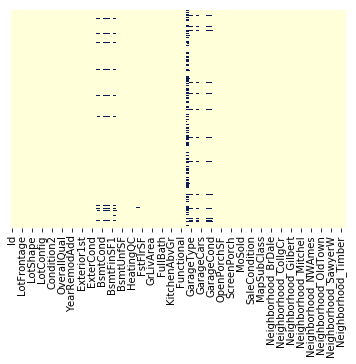

In [1007]:
sns.heatmap(housing_train_set.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [1008]:
housing_train_set.isnull().sum()

Id                       0
MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                31
BsmtCond                 0
BsmtExposure            32
BsmtFinType1            31
                        ..
SaleType                 0
SaleCondition            0
SalePrice                0
SaleCondBin              0
MapSubClass              0
MSZoning_cat             0
N